Mount Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


Change Directory to Working Directory

In [0]:
import os
os.chdir('/content/gdrive/My Drive/132A/Project')
!ls

 16QAM		     LLRs_4QAM_10.png   loss_16QAM_15.png   loss_BPSK_20.png
 4QAM		     LLRs_4QAM_15.png   loss_4QAM_10.png    Mixed
 BPSK		     LLRs_4QAM_20.png   loss_4QAM_15.png    Parameters.gsheet
'BPSK Trash Data'    LLRs_BPSK_10.png   loss_4QAM_20.png    Plots
 LLRs_16QAM_10.png   LLRs_BPSK_15.png   loss_BPSK_10.png
 LLRs_16QAM_15.png   LLRs_BPSK_20.png   loss_BPSK_15.png


Load Data

In [0]:
import numpy as np
import pandas as pd
import scipy.io as sio

def unison_shuffled_copies(a, b, c, d, e, f):
    assert (len(a) == len(b)) and (len(a) == len(c)) and (len(b) == len(c)) and (len(a)==len(d)) and (len(a)==len(e)) and (len(a)==len(f))
    p = np.random.permutation(len(a))
    return a[p], b[p], c[p], d[p], e[p], f[p]

sym_r = []
sym_i = []
LLR0 = []
LLR1 = []
LLR2 = []
LLR3 = []
for i in range(4):
  x = sio.loadmat('16QAM/Raw Data/15 dB/16QAM_sym_15_' + str(i+1) + '.mat')
  y0 = sio.loadmat('16QAM/Raw Data/15 dB/16QAM_LLR_b0_15_' + str(i+1) + '.mat')
  y1 = sio.loadmat('16QAM/Raw Data/15 dB/16QAM_LLR_b1_15_' + str(i+1) + '.mat')
  y2 = sio.loadmat('16QAM/Raw Data/15 dB/16QAM_LLR_b2_15_' + str(i+1) + '.mat')
  y3 = sio.loadmat('16QAM/Raw Data/15 dB/16QAM_LLR_b3_15_' + str(i+1) + '.mat')
  x_d = x['z_16QAM']
  LLR_b0 = y0['LLR_b0_16QAM']
  LLR_b1 = y1['LLR_b1_16QAM']
  LLR_b2 = y2['LLR_b2_16QAM']
  LLR_b3 = y3['LLR_b3_16QAM']
  sym_r.append(np.asarray(x_d.real.ravel()))
  sym_i.append(np.asarray(x_d.imag.ravel()))
  LLR0.append(np.asarray(LLR_b0.ravel()))
  LLR1.append(np.asarray(LLR_b1.ravel()))
  LLR2.append(np.asarray(LLR_b2.ravel()))
  LLR3.append(np.asarray(LLR_b3.ravel()))
  sym_r[i] = sym_r[i].reshape(1, -1)
  sym_i[i] = sym_i[i].reshape(1, -1)
  LLR0[i] = LLR0[i].reshape(1, -1)
  LLR1[i] = LLR1[i].reshape(1, -1)
  LLR2[i] = LLR2[i].reshape(1, -1)
  LLR3[i] = LLR3[i].reshape(1, -1)
  sym_r[i][0], sym_i[i][0], LLR0[i][0], LLR1[i][0], LLR2[i][0], LLR3[i][0] = unison_shuffled_copies(sym_r[i][0], sym_i[i][0], LLR0[i][0], LLR1[i][0], LLR2[i][0], LLR3[i][0])
  
print(sym_i[0])
print(LLR0[0])
print(LLR1[0])
print(LLR2[0])
print(LLR3[0])

[[-3.08125255  3.0259951   1.00085923 ...  3.13516424 -3.02467894
   3.06169327]]
[[-124.67035967  129.98390105 -154.98826322 ...  479.92342288
   127.89605769  478.74809643]]
[[ 128.31185314  122.99831177   97.9939496  ... -113.47060504
   125.08615512 -112.88294181]]
[[-526.51987447  512.54072295  126.59979178 ...  540.15857356
  -512.20775791  521.5717267 ]]
[[-136.76883083 -129.77925507  126.38242103 ... -143.58818038
  -129.61277255 -134.29475694]]


In [0]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input, Concatenate, BatchNormalization, Activation
from keras import optimizers

def llr_model():
    Nsym = 10000
    input1 = Input(shape=(Nsym,))
    input2 = Input(shape=(Nsym,))
    merged = Concatenate(axis=1)([input1, input2])

    dense1 = Dense(4096, kernel_initializer='truncated_normal', activation = 'relu')(merged)
    dropout1 = Dropout(0.2)(dense1)

    dense2 = Dense(2048, kernel_initializer='truncated_normal', activation = 'relu')(dropout1)
    dropout2 = Dropout(0.2)(dense2)

    dense3 = Dense(1024, kernel_initializer='truncated_normal', activation = 'relu')(dropout2)
    dropout3 = Dropout(0.2)(dense3)

    dense4 = Dense(512, kernel_initializer='truncated_normal', activation = 'relu')(dropout3)
    dropout4 = Dropout(0.2)(dense4)
    
    dense5 = Dense(256, kernel_initializer='truncated_normal', activation = 'relu')(dropout4)
    dropout5 = Dropout(0.2)(dense4)

    dense6 = Dense(128, kernel_initializer='truncated_normal', activation = 'relu')(dropout5)
    dropout6 = Dropout(0.3)(dense6)

    output0 = Dense(10000, kernel_initializer='truncated_normal', activation = 'linear')(dropout4)
    output2 = Dense(10000, kernel_initializer='truncated_normal', activation = 'linear')(dropout4)

    output1 = Dense(10000, kernel_initializer='truncated_normal', activation = 'linear')(dropout6)
    output3 = Dense(10000, kernel_initializer='truncated_normal', activation = 'linear')(dropout6)

    model = Model(inputs=[input1, input2], output = [output0, output1, output2, output3])
    Adam=optimizers.Adam(lr=1.0, beta_1=0.9, beta_2=0.999, decay=0.99, amsgrad=False)
    model.compile(loss="mean_squared_logarithmic_error", optimizer = 'Adam', metrics = ["mean_squared_error"], target_tensors = None)
    
    return model

In [0]:
import keras
import matplotlib.pyplot as plt

batchsize = 2**7  # training batch size
snrdb = 5.0
nb_epochs = 50     # number of epochs to train on
model = llr_model()

print (model.summary())
history = model.fit([sym_r[0], sym_i[0]], [LLR0[0], LLR1[0], LLR2[0], LLR3[0]], batch_size=batchsize, epochs = 500, validation_data = ([sym_r[1], sym_i[1]], [LLR0[1], LLR1[1], LLR2[1], LLR3[1]]), shuffle=True)

# Show performance
score = model.evaluate([sym_r[2], sym_i[2]], [LLR0[2], LLR1[2], LLR2[2], LLR3[2]], steps = batchsize)
print(score)

fig = plt.figure()
plt.title('Training performance')
plt.plot(history.epoch, history.history['loss'], label='train loss+error')
plt.legend()
fig.savefig("loss_16QAM_15.png")
plt.close(fig)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 10000)        0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           (None, 10000)        0                                            
__________________________________________________________________________________________________
concatenate_5 (Concatenate)     (None, 20000)        0           input_9[0][0]                    
                                                                 input_10[0][0]                   
__________________________________________________________________________________________________
dense_41 (Dense)                (None, 4096)         81924096    concatenate_5[0][0]        

1/1 [==============================] - 0s 368ms/step


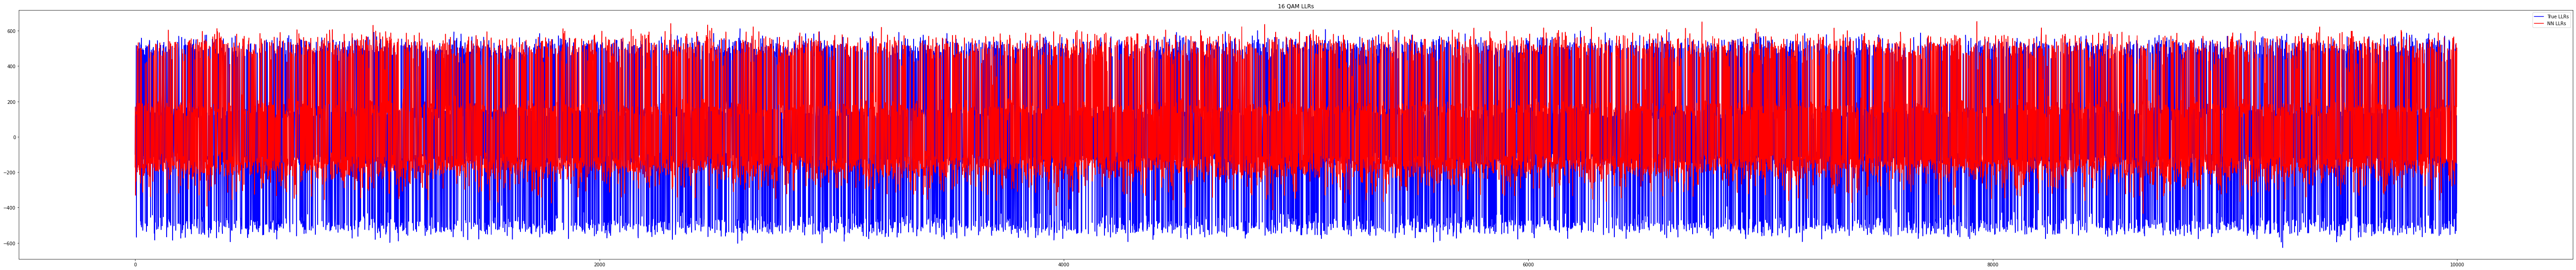

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(100,10))
pred_llrs0, pred_llrs1, pred_llrs2, pred_llrs3 = model.predict([sym_r[3], sym_i[3]], verbose = 1, batch_size = None)
plt.plot(LLR0[3][0],'b', label = 'True LLRs')
plt.plot(pred_llrs0[0],'r', label = 'NN LLRs')
plt.title('16 QAM LLRs')
plt.legend()
plt.show()
fig.savefig("LLRs_16QAM_15.png")

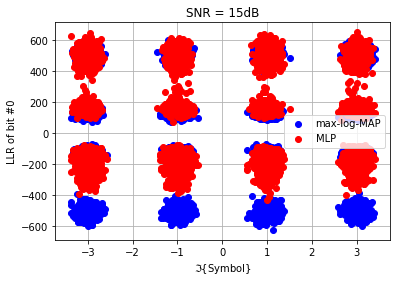

In [0]:
fig2 = plt.figure()
plt.scatter(sym_i[3][0], LLR0[3][0], c='b', label='max-log-MAP', zorder=2)
plt.scatter(sym_i[3][0], pred_llrs0[0], c='r', label='MLP', zorder=3)
plt.title('SNR = 15dB')
plt.grid(True)
plt.ylabel('LLR of bit #0')
plt.xlabel(r'$\Im$' + '{Symbol}')
plt.legend()
fig2.savefig("Plots/16QAM_LLR_b0_15.png")
plt.show()

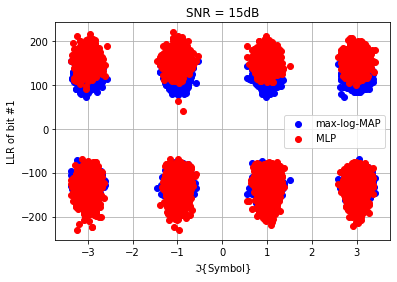

In [0]:
fig3 = plt.figure()
plt.scatter(sym_i[3][0], LLR1[3][0], c='b', label='max-log-MAP', zorder=2)
plt.scatter(sym_i[3][0], pred_llrs1[0], c='r', label='MLP', zorder=3)
plt.title('SNR = 15dB')
plt.grid(True)
plt.ylabel('LLR of bit #1')
plt.xlabel(r'$\Im$' + '{Symbol}')
plt.legend()
fig3.savefig("Plots/16QAM_LLR_b1_15.png")
plt.show()

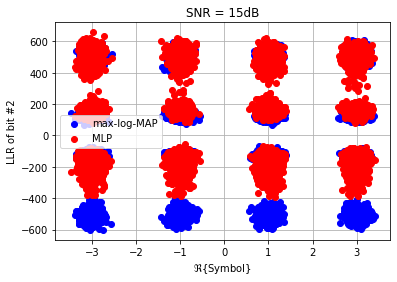

In [0]:
fig4 = plt.figure()
plt.scatter(sym_r[3][0], LLR2[3][0], c='b', label='max-log-MAP', zorder=2)
plt.scatter(sym_r[3][0], pred_llrs2[0], c='r', label='MLP', zorder=3)
plt.title('SNR = 15dB')
plt.grid(True)
plt.ylabel('LLR of bit #2')
plt.xlabel(r'$\Re$' + '{Symbol}')
plt.legend()
fig4.savefig("Plots/16QAM_LLR_b2_15.png")
plt.show()

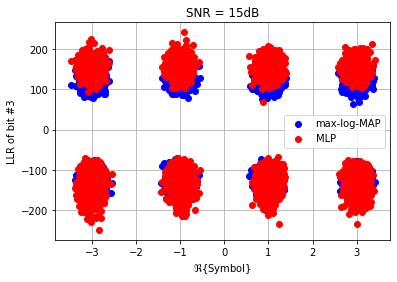

In [0]:
fig5 = plt.figure()
plt.scatter(sym_r[3][0], LLR3[3][0], c='b', label='max-log-MAP', zorder=2)
plt.scatter(sym_r[3][0], pred_llrs3[0], c='r', label='MLP', zorder=3)
plt.title('SNR = 15dB')
plt.grid(True)
plt.ylabel('LLR of bit #3')
plt.xlabel(r'$\Re$' + '{Symbol}')
plt.legend()
fig5.savefig("Plots/16QAM_LLR_b3_15.png")
plt.show()